In [166]:
import pandas as pd
space_missions = pd.read_csv("Space_data_raw.csv")

    # We are going to take a look at few categorical variables and summarize them. 
    # There are two variables:  Location and Status Mission that I'd like to take a look at. 
    # Let's make sure we have clean data to analyze and get a closer look at categorical variables.

space_missions['Country'] = space_missions['Location'].str.split().str[-1]
print(space_missions.head())

print(space_missions.Country.value_counts())
print(space_missions['Status Mission'].value_counts())
print(space_missions['Status Rocket'].value_counts())

   Unnamed: 0.1  Unnamed: 0 Company Name  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  

In [68]:
    # Assuming that status mission is an ordinal variable, what is the central tendency and the spread? 
import numpy as np
print(space_missions['Status Mission'].value_counts())
ordered_s_m = ['Prelaunch Failure','Failure','Partial Failure', 'Success']
space_missions['Status Mission'] = pd.Categorical(space_missions['Status Mission'], ordered_s_m, ordered = True)
median_ind = np.median(space_missions['Status Mission'].cat.codes)
print(ordered_s_m[int(median_ind)])
    # central tendency seems to be a successful mission. What about interquartile range?
p25 = np.percentile(space_missions['Status Mission'].cat.codes, 25)
p75 = np.percentile(space_missions['Status Mission'].cat.codes, 75)
p25_percentile = ordered_s_m[int(p25)]
print(p25_percentile)
p75_percentile = ordered_s_m[int(p75)]
print(p25_percentile)
    # so, the majority of missions were reported successful. Maybe we should take a look at the most recent data? 


Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64
Success
Success
Success


In [24]:
    # Let's clean and extract a numeric year from Datum. 
space_missions['Year'] = space_missions['Datum'].str[-14:-10]
space_missions['Year'] = pd.to_numeric(space_missions['Year'], errors='coerce')
space_missions.dropna(subset=['Year'], inplace=True)

space_missions['Year'] = space_missions['Year'].astype(int)


[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993
 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980 1979
 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965
 1964 1963 1962 1961 1960 1959 1958 1957]


In [60]:
# Let's filter out only recent space missions (2000 and earlier)
print(space_missions['Year'].unique())
recent_missions = space_missions[(space_missions['Year'] >= 2000) & (space_missions['Year'] <= 2024)].copy()
# What's a central tendency and spread of new data?
print(recent_missions['Status Mission'].value_counts())
ordered_s_m_2 = ['Prelaunch Failure','Failure','Partial Failure', 'Success']
recent_missions['Status Mission'] = pd.Categorical(recent_missions['Status Mission'], ordered_s_m_2, ordered = True)
median_ind_2 = np.median(recent_missions['Status Mission'].cat.codes)
print(ordered_s_m_2[int(median_ind_2)])

   # central tendency seems to be a successful mission as well!
p25_2 = np.percentile(recent_missions['Status Mission'].cat.codes, 25)
p75_2 = np.percentile(recent_missions['Status Mission'].cat.codes, 75)
p25_percentile_2 = ordered_s_m_2[int(p25_2)]
print(p25_percentile_2)
p75_percentile_2 = ordered_s_m_2[int(p75_2)]
print(p25_percentile_2)



[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993
 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980 1979
 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965
 1964 1963 1962 1961 1960 1959 1958 1957]
Status Mission
Success              1115
Failure                49
Partial Failure        19
Prelaunch Failure       1
Name: count, dtype: int64
Success
Success
Success


Grouped_Country
Russia        0.321820
USA           0.314674
Kazakhstan    0.161744
France        0.072177
Others        0.066698
China         0.062887
Name: proportion, dtype: float64


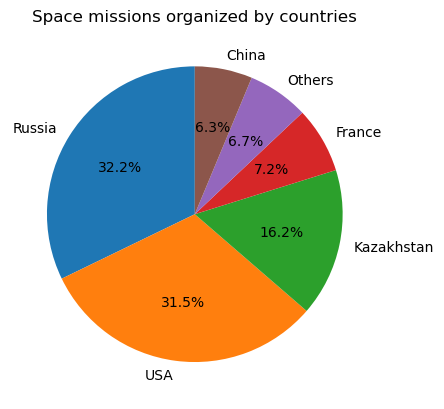

In [164]:
    # Let's switch over to  Country column. What's the proportion here like?  
country_prop = space_missions['Country'].value_counts(normalize = True, dropna = False)

import matplotlib.pyplot as plt
    # Let's group small countries with small proportion into "Others" for easier visualization. 
country_prop = space_missions['Country'].value_counts(normalize=True, dropna=False)
top_n = 5
top_countries = country_prop.nlargest(top_n).index
space_missions['Grouped_Country'] = space_missions['Country'].apply(lambda x: x if x in top_countries else 'Others')
grouped_country_prop = space_missions['Grouped_Country'].value_counts(normalize=True)
print(grouped_country_prop)
country_names = grouped_country_prop.index.tolist()
plt.pie(grouped_country_prop, labels=country_names, autopct='%1.1f%%', startangle=90)
plt.title('Space missions organized by countries')
plt.show()

In [ ]:
# As a conclusion, USA and Russia hosted the most number of space missions over the years, with Kazakhstan being 3rd most frequent. 